In [29]:
import pandas as pd
import numpy as np
import random

In [30]:
df = pd.read_csv(r'./data/preprocess.csv')

df.head()

,IDX,mean_ndvi_2022-06-02,mean_ndvi_2022-06-17,mean_ndvi_2022-06-07,mean_ndvi_2022-06-22,mean_ndvi_2022-06-12,mean_ndre_2022-06-02,mean_ndre_2022-06-17,mean_ndre_2022-06-07,mean_ndre_2022-06-12,IDX.1,sum_ndvi_2022-06-02,sum_ndvi_2022-06-17,sum_ndvi_2022-06-07,sum_ndvi_2022-06-22,sum_ndvi_2022-06-12,sum_ndre_2022-06-02,sum_ndre_2022-06-17,sum_ndre_2022-06-07,sum_ndre_2022-06-12
0,3942,0.007476,0.212770,0.180844,0.038478,0.219896,-0.017073,0.151714,0.123746,0.153333,3942,0.530825,15.106694,12.839933,2.731913,15.612608,-1.212181,10.771678,8.785966,10.886635
1,4053,0.008709,0.202058,0.165046,-0.019584,0.198812,-0.007738,0.134886,0.106043,0.128798,4053,1.689533,39.199349,32.018860,-3.799293,38.569600,-1.501124,26.167940,20.572346,24.986805
2,4196,0.204576,0.192939,0.156745,-0.011448,0.186642,0.226347,0.128658,0.095656,0.117090,4196,19.639275,18.522111,15.047543,-1.099016,17.917662,21.729303,12.351145,9.183014,11.240659
3,4422,-0.001838,0.198717,0.181343,-0.002894,0.215428,-0.036878,0.132829,0.113879,0.136089,4422,-0.104746,11.326846,10.336535,-0.164956,12.279409,-2.102046,7.571269,6.491099,7.757051
4,4424,-0.046762,0.205482,0.185708,-0.005377,0.218237,-0.094255,0.145178,0.124556,0.148208,4424,-1.730197,7.602816,6.871180,-0.198932,8.074769,-3.487440,5.371600,4.608560,5.483689


In [31]:
target = pd.read_csv('./data/target_PROD.csv')

In [32]:
l = target[['PROD']]

str(list(l['PROD']))

'[31595, 3285, 2581, 13155, 2487, 0, 3843, 2537, 14912, 10374, 5482, 6076, 4489, 1235, 12240, 10599, 4426, 691, 5631, 2173, 1729, 12134, 3248, 4940, 4322]'

In [33]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = pd.read_csv(r'./preprocess.csv')
y = l

In [34]:
import warnings
warnings.filterwarnings('ignore')

In [35]:
SEED = 42

X_train, X_test, y_train, y_test= train_test_split(
    
    X,y,
    train_size   = 0.8,
    random_state = SEED,
)

## BUSQUEDA _ HIPERPARÁMETROS

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

grid = { 
    'n_estimators': [5,10,25],
    'max_features': ['sqrt','log2'],
    'max_depth' : [3,4,5,6,7],
    'random_state' : [SEED]
}

CV_rfr = GridSearchCV(estimator=RandomForestRegressor(), param_grid=grid, cv= 5)

CV_rfr.fit(X_train, y_train)

CV_rfr

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [3, 4, 5, 6, 7],
                         'max_features': ['sqrt', 'log2'],
                         'n_estimators': [5, 10, 25], 'random_state': [42]})

In [37]:
CV_rfr.best_params_

{'max_depth': 3,
 'max_features': 'sqrt',
 'n_estimators': 10,
 'random_state': 42}

In [38]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from numpy import mean
from numpy import std

In [39]:
clf = RandomForestRegressor(**CV_rfr.best_params_)

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print(y_pred)

[7621.26154762 5317.7825     7980.97738095 5329.38809524 8267.41666667]


In [63]:
import numpy as np
from sklearn import metrics

# printamos algunas de las métricas básicas

print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error (MSE):', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error (RMSE):', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error (MAE): 6875.469666666666
Mean Squared Error (MSE): 123305227.5113765
Root Mean Squared Error (RMSE): 11104.2886990287


In [62]:
# modelo que utilizamos para los folds: con los mejores parámetros:

model = RandomForestRegressor(**CV_rfr.best_params_)

## TECNICAS _ VALIDACIÓN

In [64]:
# preparar el procedimiento de cross-validation 
cv = KFold(n_splits=10)
# evaluar el modelo
scores = cross_val_score(model, X_train, y_train, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
# mostrar el resultado
print('MAE: %.3f (%.3f)' % (abs(mean(scores)), std(scores)))

MAE: 4017.065 (1783.047)


In [65]:
from sklearn.model_selection import RepeatedKFold

# preparar el procedimiento de cross-validation 
cv = RepeatedKFold(n_splits=10, n_repeats=10)
# evaluar el modelo
scores = cross_val_score(model, X_train, y_train, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
# mostrar el resultado
print('MAE: %.3f (%.3f)' % (abs(mean(scores)), std(scores)))

MAE: 4282.070 (1790.709)


In [67]:
from sklearn.model_selection import ShuffleSplit

# preparar el procedimiento de shuffle-split
cv = ShuffleSplit(n_splits=10, random_state=1)
# evaluar el modelo
scores = cross_val_score(model, X_train, y_train, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
# mostrar el resultado
print('MAE: %.3f (%.3f)' % (abs(mean(scores)), std(scores)))

MAE: 3800.943 (1328.980)


In [ ]:
# con las técnicas de validación conseguimos reducir un poco el MAE

In [ ]:
# predecimos los datos de test

pred=clf.predict(X_test)

list(pred)

[7621.261547619048,
 5317.782499999999,
 7980.977380952381,
 5329.388095238095,
 8267.416666666668]

Visualizamos la curva de validación para el modelo.



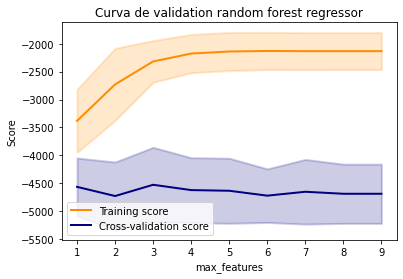

CPU times: total: 1.59 s
Wall time: 1.65 s


In [68]:
%%time

import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import validation_curve

#Lista de parámetros

param_range = range(1,10)

rnd_clf = RandomForestRegressor(**CV_rfr.best_params_)

#Solución

#Curva de validación
train_scores, validation_scores = validation_curve( 
       
    rnd_clf, X_train, y_train,

    param_name="max_depth", 
    param_range=param_range,
    scoring='neg_root_mean_squared_error', 
    cv=3, 
    n_jobs=1)

#Pintamos la curva
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
validation_scores_mean = np.mean(validation_scores, axis=1)
validation_scores_std = np.std(validation_scores, axis=1)

plt.title("Curva de validation random forest regressor")
plt.xlabel(r"max_features")
plt.ylabel("Score")
lw = 2
plt.plot(param_range, train_scores_mean, label="Training score",
             color="darkorange", lw=lw)
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=lw)
plt.plot(param_range, validation_scores_mean, label="Cross-validation score",
             color="navy", lw=lw)
plt.fill_between(param_range, validation_scores_mean - validation_scores_std,
                 validation_scores_mean + validation_scores_std, alpha=0.2,
                 color="navy", lw=lw)
plt.legend(loc="best")
plt.show()